In [1]:
!pip install kaggle

In [5]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [9]:
import json
token = {"username":"vineethsheri","key":"aa2c12d6139cf02dbe92f9c8182ed621"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [10]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [11]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [12]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              217KB  2021-03-24 09:00:10            916  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            718  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            668  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            279  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [13]:
!kaggle datasets list -s sentiment

ref                                                       title                                             size  lastUpdated          downloadCount  
--------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
crowdflower/twitter-airline-sentiment                     Twitter US Airline Sentiment                       3MB  2019-10-16 00:04:05          51242  
harriken/emoji-sentiment                                  Emoji sentiment                                   12MB  2017-10-01 09:56:54           2774  
kazanova/sentiment140                                     Sentiment140 dataset with 1.6 million tweets      81MB  2017-09-13 22:43:19          50752  
yash612/stockmarket-sentiment-dataset                     Stock-Market Sentiment Dataset                   201KB  2020-06-05 19:16:19           2577  
bittlingmayer/amazonreviews                               Amazon Reviews for Sentiment Analysi

In [14]:
!kaggle datasets download -d msambare/fer2013 -p /content


 68% 41.0M/60.3M [00:00<00:00, 47.6MB/s]
100% 60.3M/60.3M [00:00<00:00, 103MB/s] 


In [15]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import pandas as pd
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_dir = "/content/train"
test_dir = "/content/test"

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   rotation_range=5,
                                   zoom_range=0.3,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [29]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=128,
                                                target_size=(48,48),
                                                shuffle=True,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=128,
                                                target_size=(48,48),
                                                shuffle=True,
                                                class_mode='categorical')

valid_dataset = valid_datagen.flow_from_directory(train_dir,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [30]:

def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3), kernel_regularizer=l2(0.01)))
  model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
  model.add(Dropout(0.5))
      
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
      
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
      
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
      
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(7, activation='softmax'))
  return model

In [31]:
model = define_model()
epochs = 100
learning_rate = 0.001
adam = optimizers.Adam(lr = learning_rate)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/Project/Dataset/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

In [33]:
model.fit(
          training_set,
          epochs = epochs,
          validation_data=valid_dataset,
          shuffle = True,
          callbacks=[lr_reducer, checkpointer, early_stopper]
          )

Epoch 1/100
225/225 [==============================] - 43s 175ms/step - loss: 2.7168 - accuracy: 0.1625 - val_loss: 1.9253 - val_accuracy: 0.2512

Epoch 00001: val_loss improved from inf to 1.92528, saving model to /content/gdrive/MyDrive/Project/Dataset/weights.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights.hd5/assets
Epoch 2/100
225/225 [==============================] - 38s 167ms/step - loss: 2.0502 - accuracy: 0.2101 - val_loss: 1.8532 - val_accuracy: 0.2531

Epoch 00002: val_loss improved from 1.92528 to 1.85317, saving model to /content/gdrive/MyDrive/Project/Dataset/weights.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights.hd5/assets
Epoch 3/100
225/225 [==============================] - 38s 167ms/step - loss: 1.9249 - accuracy: 0.2296 - val_loss: 1.8527 - val_accuracy: 0.2561

Epoch 00003: val_loss improved from 1.85317 to 1.85273, saving model to /content/gdrive/MyDrive/Project/Dataset/weights.hd5
INF

In [57]:
from keras.models import model_from_json
model.save_weights("/content/gdrive/MyDrive/Project/Dataset/weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("/content/gdrive/MyDrive/Project/Dataset/FERmodel10.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/gdrive/MyDrive/Project/Dataset/FERmodel10.h5")
print("Saved model to disk")

In [85]:
from keras.models import load_model
model.load_weights('/content/gdrive/MyDrive/Project/Dataset/FERmodel10.h5')

predicted_test_labels = np.argmax(model.predict(valid_dataset), axis=1)
print ("Accuracy score = ", accuracy_score(valid_dataset.classes, predicted_test_labels))

Accuracy score =  0.17470823898275561


In [83]:
test_set.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [81]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       angry       0.13      0.13      0.13       958
     disgust       0.03      0.02      0.02       111
        fear       0.13      0.11      0.12      1024
       happy       0.24      0.24      0.24      1774
     neutral       0.18      0.21      0.19      1233
         sad       0.16      0.15      0.15      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [48]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 8.0MB/s 


In [78]:
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from google.colab.patches import cv2_imshow

def get_emotion(imgLocation):
    detector = MTCNN()
    img = cv2.imread(imgLocation)
    gray = img
    class_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
    # 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

    faces = detector.detect_faces(img)
    for result in faces:
        x, y, w, h = result['box']
        x1, y1 = x + w, y + h
        cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
        # make a prediction on the ROI, then lookup the class
            preds = model.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(img,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2_imshow(img)

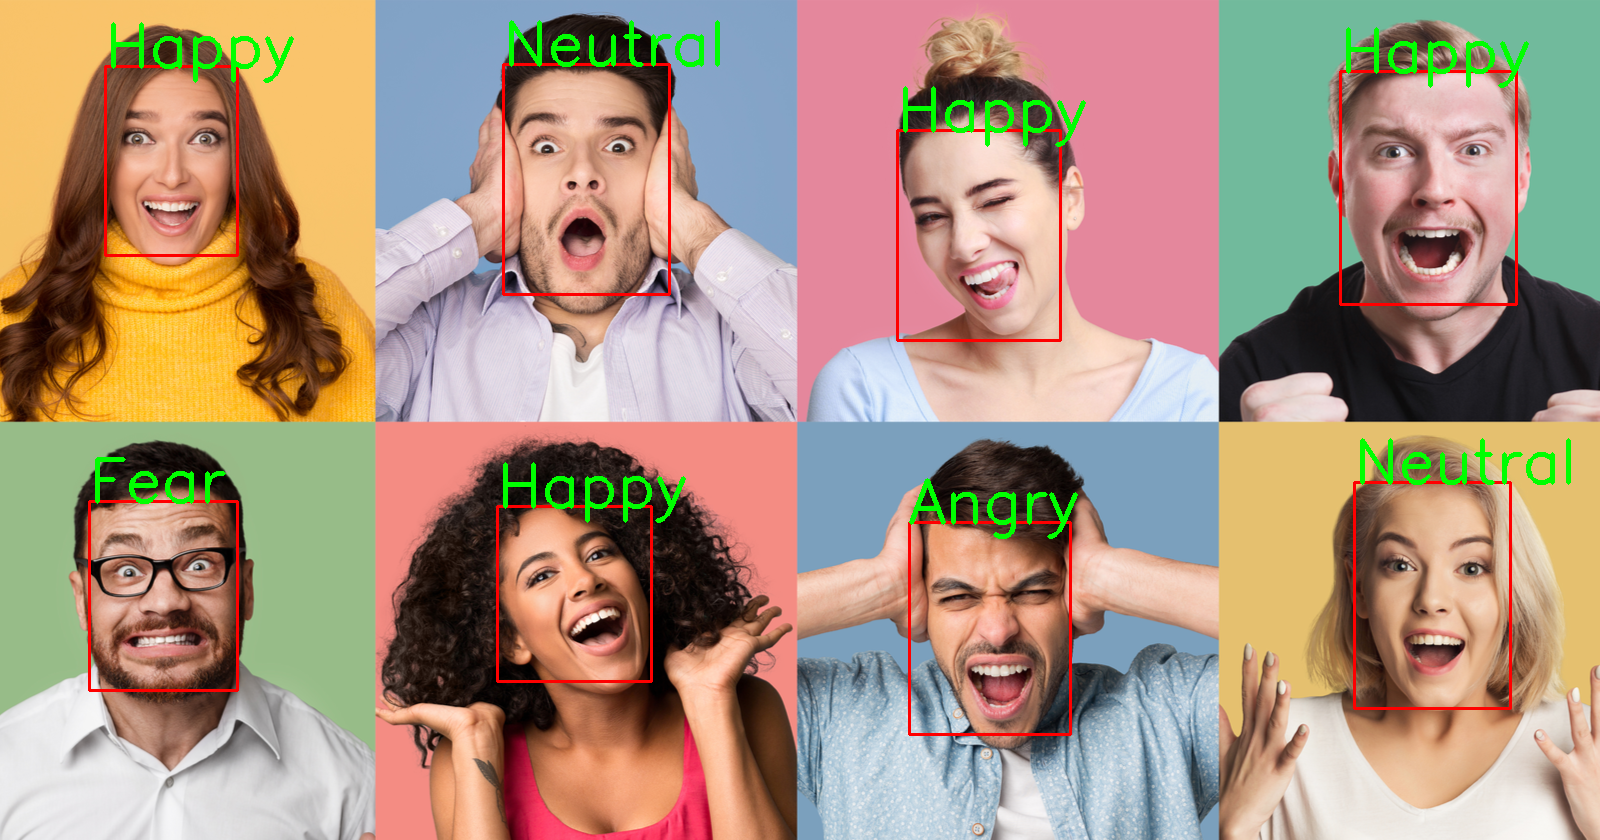

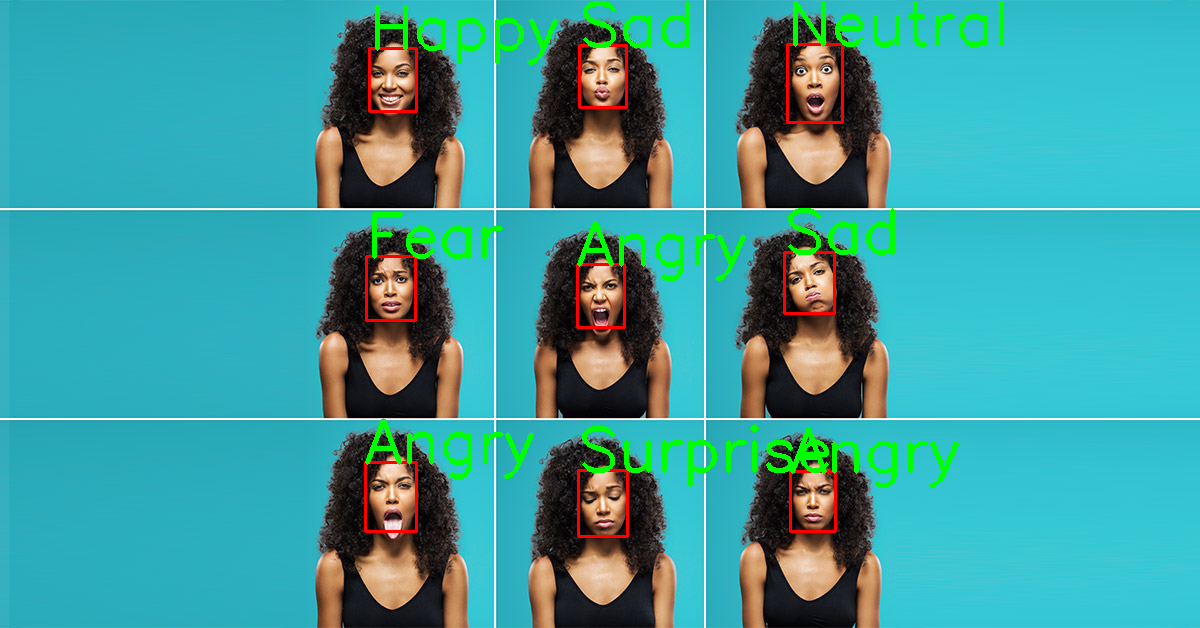

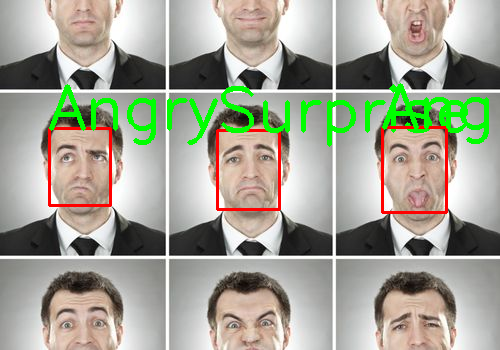

In [79]:
get_emotion("/content/1.png")
get_emotion("/content/2.jpg")
get_emotion("/content/3.jpg")

In [63]:
model.fit(
          training_set,
          epochs = epochs,
          validation_data=test_set,
          shuffle = True,
          callbacks=[lr_reducer, checkpointer, early_stopper]
          )

Epoch 1/100
225/225 [==============================] - 37s 165ms/step - loss: 0.8314 - accuracy: 0.7061 - val_loss: 0.9368 - val_accuracy: 0.6728

Epoch 00001: val_loss did not improve from 0.61013
Epoch 2/100
 33/225 [===>..........................] - ETA: 30s - loss: 0.8127 - accuracy: 0.7171

KeyboardInterrupt: ignored

In [20]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=128,
                                                target_size=(96,96),
                                                shuffle=True,
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=128,
                                                target_size=(96,96),
                                                shuffle=True,
                                                class_mode='categorical')

valid_dataset = valid_datagen.flow_from_directory(train_dir,
                                                  target_size = (96,96),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [28]:
model1 = tf.keras.applications.MobileNetV2(input_shape=(96,96,3))

In [29]:
base_input = model1.layers[0].input
base_output = model1.layers[-2].output
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output =layers.Dense(7,activation='softmax')(final_output)

In [30]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

epochs = 10
learning_rate = 0.001
adam = optimizers.Adam(lr = learning_rate)
new_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3)
early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=6, mode='auto')
checkpointer = ModelCheckpoint('/content/gdrive/MyDrive/Project/Dataset/weights100.hd5', monitor='val_loss', verbose=1, save_best_only=True)

In [34]:
new_model.save_weights("/content/gdrive/MyDrive/Project/Dataset/FERmodel100.h5")

In [110]:
new_model.fit(
          training_set,
          epochs = epochs,
          validation_data = valid_dataset,
          callbacks=[lr_reducer, checkpointer, early_stopper]
          )

Epoch 1/10
225/225 [==============================] - 85s 354ms/step - loss: 1.5239 - accuracy: 0.4106 - val_loss: 2.1044 - val_accuracy: 0.3686

Epoch 00001: val_loss improved from inf to 2.10440, saving model to /content/gdrive/MyDrive/Project/Dataset/weights100.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights100.hd5/assets
Epoch 2/10
225/225 [==============================] - 80s 357ms/step - loss: 1.2020 - accuracy: 0.5469 - val_loss: 2.9557 - val_accuracy: 0.2082

Epoch 00002: val_loss did not improve from 2.10440
Epoch 3/10
225/225 [==============================] - 81s 359ms/step - loss: 1.1216 - accuracy: 0.5778 - val_loss: 2.0413 - val_accuracy: 0.3951

Epoch 00003: val_loss improved from 2.10440 to 2.04125, saving model to /content/gdrive/MyDrive/Project/Dataset/weights100.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights100.hd5/assets
Epoch 4/10
225/225 [==============================] - 80s 354ms/ste

In [111]:
new_model.fit(
          training_set,
          epochs = epochs,
          validation_data = valid_dataset,
          callbacks=[lr_reducer, checkpointer, early_stopper]
          )

Epoch 1/10
225/225 [==============================] - 78s 345ms/step - loss: 0.9095 - accuracy: 0.6608 - val_loss: 1.9783 - val_accuracy: 0.4780

Epoch 00001: val_loss did not improve from 1.89286
Epoch 2/10
225/225 [==============================] - 78s 344ms/step - loss: 0.8952 - accuracy: 0.6657 - val_loss: 2.4120 - val_accuracy: 0.4344

Epoch 00002: val_loss did not improve from 1.89286
Epoch 3/10
225/225 [==============================] - 78s 345ms/step - loss: 0.8841 - accuracy: 0.6672 - val_loss: 1.7561 - val_accuracy: 0.5349

Epoch 00003: val_loss improved from 1.89286 to 1.75612, saving model to /content/gdrive/MyDrive/Project/Dataset/weights100.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights100.hd5/assets
Epoch 4/10
225/225 [==============================] - 78s 345ms/step - loss: 0.8808 - accuracy: 0.6730 - val_loss: 1.5073 - val_accuracy: 0.5908

Epoch 00004: val_loss improved from 1.75612 to 1.50729, saving model to /content/gdrive/My

In [36]:
new_model.fit(
          training_set,
          epochs = 20,
          validation_data = valid_dataset,
          callbacks=[lr_reducer, checkpointer, early_stopper]
          )

Epoch 1/20
225/225 [==============================] - 75s 334ms/step - loss: 0.7657 - accuracy: 0.7144 - val_loss: 1.3494 - val_accuracy: 0.5994

Epoch 00001: val_loss did not improve from 1.21416
Epoch 2/20
225/225 [==============================] - 75s 332ms/step - loss: 0.7562 - accuracy: 0.7203 - val_loss: 1.0687 - val_accuracy: 0.6468

Epoch 00002: val_loss improved from 1.21416 to 1.06866, saving model to /content/gdrive/MyDrive/Project/Dataset/weights100.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights100.hd5/assets
Epoch 3/20
225/225 [==============================] - 75s 331ms/step - loss: 0.7495 - accuracy: 0.7210 - val_loss: 1.0405 - val_accuracy: 0.6520

Epoch 00003: val_loss improved from 1.06866 to 1.04047, saving model to /content/gdrive/MyDrive/Project/Dataset/weights100.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights100.hd5/assets
Epoch 4/20
225/225 [==============================] - 75s 334ms

In [47]:
predicted_test_labels = np.argmax(new_model.predict(valid_dataset), axis=1)
print ("Accuracy score = ", accuracy_score(predicted_test_labels,valid_dataset.classes))

Accuracy score =  0.16965685420658422


In [42]:
from keras.models import model_from_json
model_json = new_model.to_json()
with open("/content/gdrive/MyDrive/Project/Dataset/FERmodel100.json", "w") as json_file:
    json_file.write(model_json)

In [39]:
# serialize weights to HDF5
new_model.save_weights("/content/gdrive/MyDrive/Project/Dataset/FERmodel100.h5")
print("Saved model to disk")

Saved model to disk


In [40]:
new_model.fit(
          training_set,
          epochs = 20,
          validation_data = valid_dataset,
          callbacks=[lr_reducer, checkpointer, early_stopper]
          )

Epoch 1/20
225/225 [==============================] - 74s 330ms/step - loss: 0.5059 - accuracy: 0.8119 - val_loss: 0.6651 - val_accuracy: 0.7837

Epoch 00001: val_loss improved from 0.80708 to 0.66510, saving model to /content/gdrive/MyDrive/Project/Dataset/weights100.hd5
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Project/Dataset/weights100.hd5/assets
Epoch 2/20
225/225 [==============================] - 74s 330ms/step - loss: 0.4917 - accuracy: 0.8162 - val_loss: 0.9407 - val_accuracy: 0.7309

Epoch 00002: val_loss did not improve from 0.66510
Epoch 3/20
225/225 [==============================] - 75s 332ms/step - loss: 0.4807 - accuracy: 0.8204 - val_loss: 0.9147 - val_accuracy: 0.7352

Epoch 00003: val_loss did not improve from 0.66510
Epoch 4/20
225/225 [==============================] - 74s 330ms/step - loss: 0.4768 - accuracy: 0.8224 - val_loss: 0.6742 - val_accuracy: 0.7915

Epoch 00004: val_loss did not improve from 0.66510
Epoch 5/20
225/225 [===================

In [41]:
predicted_test_labels

array([3, 3, 3, ..., 4, 4, 3])

In [51]:
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from google.colab.patches import cv2_imshow

def get_emotion(imgLocation):
    detector = MTCNN()
    img = cv2.imread(imgLocation)
    gray = img
    class_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']
    # 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

    faces = detector.detect_faces(img)
    for result in faces:
        x, y, w, h = result['box']
        x1, y1 = x + w, y + h
        cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(96,96),interpolation=cv2.INTER_AREA)
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
        # make a prediction on the ROI, then lookup the class
            preds = new_model.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(img,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2_imshow(img)

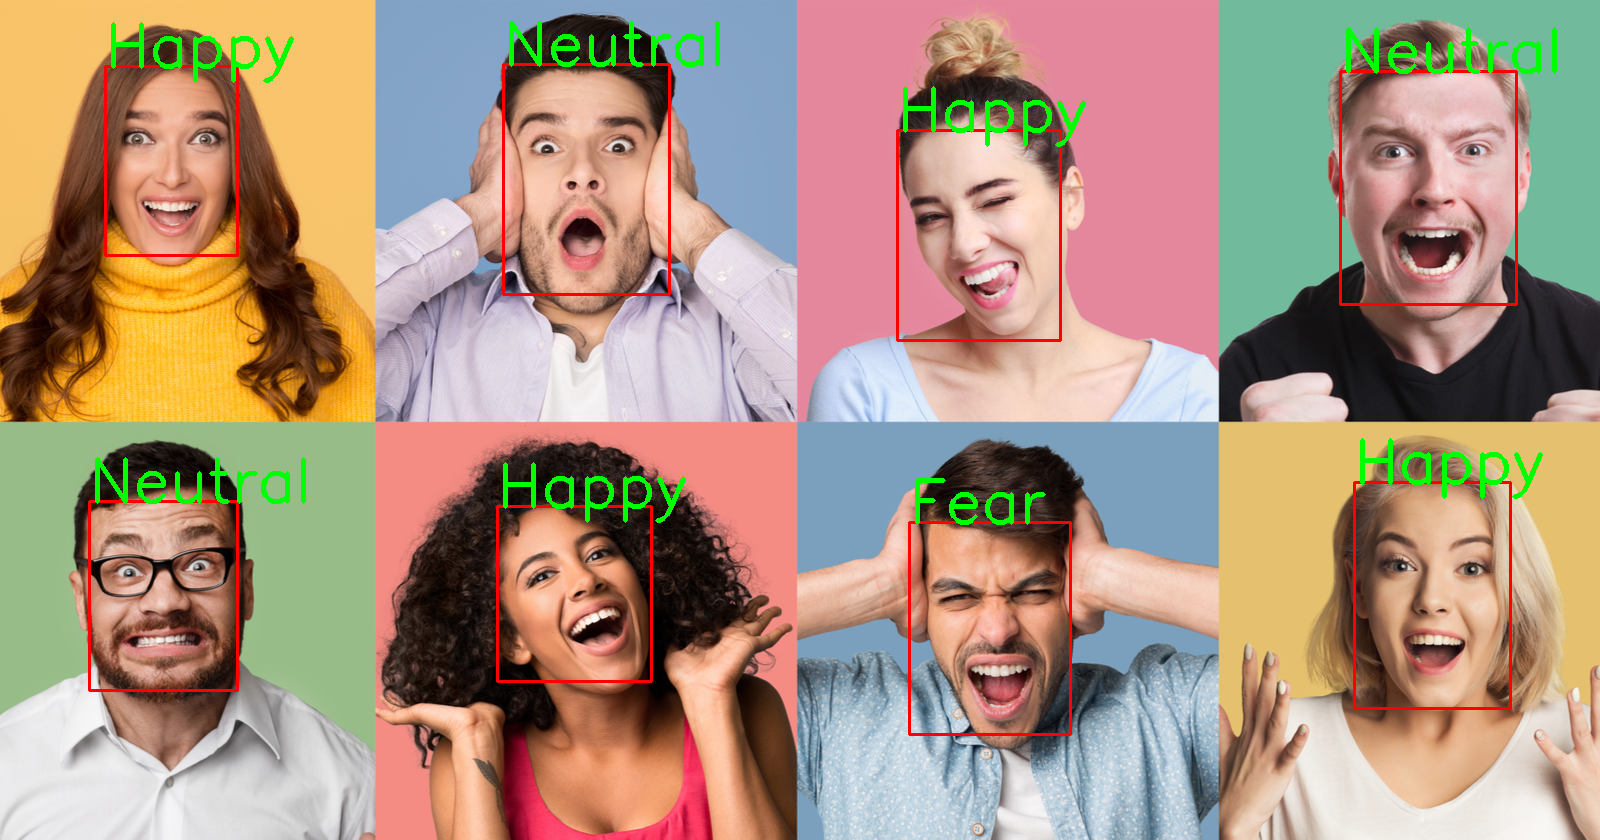

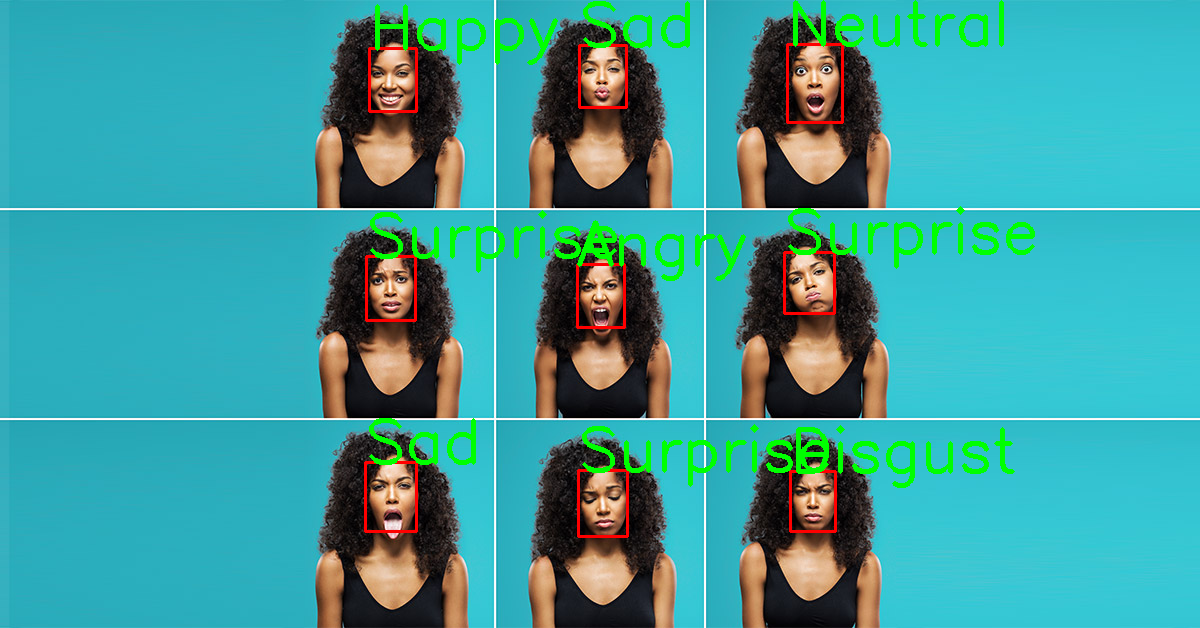

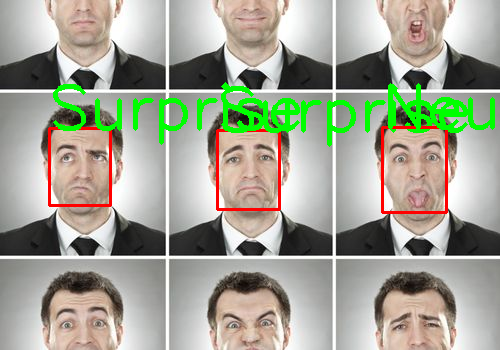

In [52]:
get_emotion("/content/1.png")
get_emotion("/content/2.jpg")
get_emotion("/content/3.jpg")